# Data Science Capstone Project 1: Data Wrangling
    
This notebook contains the code for wrangling the data for my first capstone project.

In [1]:
#Import packages

import requests
import os
from zipfile import ZipFile
import pandas as pd
import glob
import matplotlib.pyplot as plt

In [2]:
#Get data from Kaggle's API

!kaggle competitions download -c recruit-restaurant-visitor-forecasting


  0%|          | 0.00/1.85k [00:00<?, ?B/s]
100%|##########| 1.85k/1.85k [00:00<00:00, 56.3kB/s]

  0%|          | 0.00/73.9k [00:00<?, ?B/s]
100%|##########| 73.9k/73.9k [00:00<00:00, 491kB/s]

  0%|          | 0.00/13.5k [00:00<?, ?B/s]
100%|##########| 13.5k/13.5k [00:00<00:00, 2.24MB/s]

  0%|          | 0.00/905k [00:00<?, ?B/s]
100%|##########| 905k/905k [00:01<00:00, 592kB/s]

  0%|          | 0.00/3.34k [00:00<?, ?B/s]
100%|##########| 3.34k/3.34k [00:00<00:00, 245kB/s]

  0%|          | 0.00/605k [00:00<?, ?B/s]
100%|##########| 605k/605k [00:01<00:00, 351kB/s]

  0%|          | 0.00/71.1k [00:00<?, ?B/s]
100%|##########| 71.1k/71.1k [00:00<00:00, 457kB/s]

  0%|          | 0.00/24.4M [00:00<?, ?B/s]
  4%|4         | 1.00M/24.4M [00:03<01:19, 307kB/s]
  8%|8         | 2.00M/24.4M [00:06<01:15, 313kB/s]
 12%|#2        | 3.00M/24.4M [00:10<01:12, 311kB/s]
 16%|#6        | 4.00M/24.4M [00:19<01:45, 203kB/s]
 20%|##        | 5.00M/24.4M [00:26<01:52, 180kB/s]
 25%|##4       | 6.0

In [3]:
#Define function for unzipping files

def unzip(files,path):
    for i in files:
        zf = ZipFile(i,'r')
        zf.extractall(path)
        zf.close()

In [4]:
#List paths of files to be unzipped and unzip files

files = ['C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/air_reserve.csv.zip',
        'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/air_store_info.csv.zip',
        'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/air_visit_data.csv.zip',
        'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/date_info.csv.zip',
        'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/hpg_reserve.csv.zip',
        'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/hpg_store_info.csv.zip',
        'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/sample_submission.csv.zip',
        'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/store_id_relation.csv.zip']
path = 'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data'
unzip(files, path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/air_reserve.csv.zip'

In [5]:
#Get files with weather data
!kaggle datasets download -d huntermcgushion/rrv-weather-data

rrv-weather-data.zip: Skipping, found more recently modified local copy (use --force to force download)


In [6]:
#Define file and path for unzipping weather data
files = ['C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/rrv-weather-data.zip']
path = 'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/Weather'
#Unzip first set of weather files
unzip(files,path)

In [7]:
#Define file and path for weather data by detector
files = ['C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/Weather/1-1-16_5-31-17_Weather.zip']
path = 'C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/Weather'
#Unzip weather data by detector
unzip(files,path)

In [8]:
#Read files into local environment
air_reserve = pd.read_csv('C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/air_reserve.csv')
air_store_info = pd.read_csv('C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/air_store_info.csv')
air_visit_data = pd.read_csv('C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/air_visit_data.csv')
date_info = pd.read_csv('C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/date_info.csv')

In [9]:
#Check restaurant data for missing values
print(air_reserve.info())
print(air_visit_data.info())
print(air_store_info.info())
print(date_info.info())

#Data has no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92378 entries, 0 to 92377
Data columns (total 4 columns):
air_store_id        92378 non-null object
visit_datetime      92378 non-null object
reserve_datetime    92378 non-null object
reserve_visitors    92378 non-null int64
dtypes: int64(1), object(3)
memory usage: 2.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
air_store_id    252108 non-null object
visit_date      252108 non-null object
visitors        252108 non-null int64
dtypes: int64(1), object(2)
memory usage: 5.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 829 entries, 0 to 828
Data columns (total 5 columns):
air_store_id      829 non-null object
air_genre_name    829 non-null object
air_area_name     829 non-null object
latitude          829 non-null float64
longitude         829 non-null float64
dtypes: float64(2), object(3)
memory usage: 32.5+ KB
None
<class 'pandas.core.frame.DataFrame

In [10]:
#Set air_visit_data index to visit date - must convert visit_date to date-time
air_visit_data.visit_date = pd.to_datetime(air_visit_data.visit_date)
air_visit_data = air_visit_data.set_index('visit_date')

In [11]:
#Groupby air_store_id and collapse data by day and get sum of visitors

air_visit_day = air_visit_data.groupby('air_store_id').resample('1d').sum().reset_index()

In [12]:
air_visit_day.head()

,air_store_id,visit_date,visitors
0,air_00a91d42b08b08d9,2016-07-01,35
1,air_00a91d42b08b08d9,2016-07-02,9
2,air_00a91d42b08b08d9,2016-07-03,0
3,air_00a91d42b08b08d9,2016-07-04,20
4,air_00a91d42b08b08d9,2016-07-05,25


In [13]:
air_visit_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296279 entries, 0 to 296278
Data columns (total 3 columns):
air_store_id    296279 non-null object
visit_date      296279 non-null datetime64[ns]
visitors        296279 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 6.8+ MB


In [14]:
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [15]:
#Going to count number of reservations made for that day by grouping by visit_datetime and counting the reserve_visitors column
#Set visit_datetime as index
air_reserve.visit_datetime = pd.to_datetime(air_reserve.visit_datetime)
air_reserve = air_reserve.set_index('visit_datetime')
#Drop reserve datetime so counting goes more smoothly
air_reserve = air_reserve.drop(columns='reserve_datetime')
air_reserve = air_reserve.groupby('air_store_id').resample('1d').count()
#Having trouble with air_store_id as a variable and an index - remove the variable but leave as index so that I can reset index
air_reserve = air_reserve.drop(columns='air_store_id')
air_reserve = air_reserve.reset_index()
#Rename reserve_visitors to reflect that it is the number of reservations made for that day
#Rename visit_date in preparation for merging datasets
air_reserve.columns = ['air_store_id','visit_date','number_of_reservations']

In [16]:
#Merge files - keep cases with data in the visit file
air_visit_day = air_visit_day.merge(air_reserve, how='left', on = ['air_store_id', 'visit_date'])
#Number of reservations is missing a ton of observations



In [17]:
#Merge restaurant info 
air_visit_day = air_visit_day.merge(air_store_info, how='left', on = ['air_store_id'])

In [18]:
#Rename calendar_date in date_info file
date_info.columns = ['visit_date', 'day_of_week', 'holiday_flg']
date_info.visit_date = pd.to_datetime(date_info.visit_date)

In [19]:
air_visit_day = air_visit_day.merge(date_info, how = 'left', on = ['visit_date'])

In [20]:
air_visit_day.head()

,air_store_id,visit_date,visitors,number_of_reservations,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg
0,air_00a91d42b08b08d9,2016-07-01,35,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0
1,air_00a91d42b08b08d9,2016-07-02,9,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0
2,air_00a91d42b08b08d9,2016-07-03,0,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0
3,air_00a91d42b08b08d9,2016-07-04,20,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0
4,air_00a91d42b08b08d9,2016-07-05,25,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0


In [21]:
#Extract station_id 
weather_dfs=[]
weather_files = glob.glob('C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/Weather/1-1-16_5-31-17_Weather/*.csv')
print('all files len={}',len(weather_files))
for path in weather_files:
    weather_df = pd.read_csv(path)
    weather_df['station_id'] = path.split('\\')[-1].rstrip('.csv')
    weather_dfs.append(weather_df)

weather = pd.concat(weather_dfs, axis='rows')

weather.rename(columns={'calendar_date': 'visit_date'}, inplace=True)

weather.head()

all files len={} 1663


,visit_date,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover,station_id
0,2016-01-01,6.0,11.0,0.7,0.0,9.1,NaN,NaN,NaN,2.9,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
1,2016-01-02,4.7,10.5,0.0,0.0,6.8,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
2,2016-01-03,7.0,13.8,1.9,0.0,8.6,NaN,NaN,NaN,1.4,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
3,2016-01-04,8.8,14.7,2.7,0.0,5.3,NaN,NaN,NaN,2.2,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai
4,2016-01-05,8.9,14.1,3.4,0.0,4.5,NaN,NaN,NaN,2.7,NaN,NaN,NaN,NaN,NaN,aichi__ai-xi-kana__isaai


In [22]:
#Free up memory by clearing weather_dfs
del weather_dfs

In [23]:
#Get air_id to weather station crosswalk
crosswalk = pd.read_csv('C:/Users/robva/Springboard/Capstone Project 1/Data Wrangling/Data/Weather/air_store_info_with_nearest_active_station.csv')
crosswalk = crosswalk[['air_store_id','station_id']]

#Check for duplicates
crosswalk.duplicated().sum()
#No duplicates

0

In [24]:
#Set weather visit_date to datetime
weather.visit_date = pd.to_datetime(weather.visit_date)

In [25]:
#Merge weather and visit information
air_visit_day = air_visit_day.merge(crosswalk, how='left', on = ['air_store_id'])
air_visit_day = air_visit_day.merge(weather, how='left', on =['station_id','visit_date'])


In [26]:
air_visit_day.head()

,air_store_id,visit_date,visitors,number_of_reservations,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,...,hours_sunlight,solar_radiation,deepest_snowfall,total_snowfall,avg_wind_speed,avg_vapor_pressure,avg_local_pressure,avg_humidity,avg_sea_pressure,cloud_cover
0,air_00a91d42b08b08d9,2016-07-01,35,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,...,4.4,15.25,NaN,NaN,2.3,27.0,1010.2,83.0,1013.0,10.0
1,air_00a91d42b08b08d9,2016-07-02,9,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,...,6.9,21.04,NaN,NaN,3.0,27.8,1007.6,79.0,1010.4,9.5
2,air_00a91d42b08b08d9,2016-07-03,0,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,...,7.6,22.66,NaN,NaN,3.3,28.5,1003.8,71.0,1006.6,9.0
3,air_00a91d42b08b08d9,2016-07-04,20,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,...,7.1,20.90,NaN,NaN,2.4,27.7,1008.4,75.0,1011.2,3.3
4,air_00a91d42b08b08d9,2016-07-05,25,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,...,0.0,3.82,NaN,NaN,3.1,21.1,1016.5,81.0,1019.3,10.0


In [27]:
#Drop irrelevant weather variables
air_visit_day = air_visit_day.drop(columns=['cloud_cover','avg_sea_pressure','avg_humidity','avg_local_pressure','avg_vapor_pressure',
                           'avg_wind_speed','total_snowfall','deepest_snowfall','solar_radiation'])
air_visit_day.head()

,air_store_id,visit_date,visitors,number_of_reservations,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight
0,air_00a91d42b08b08d9,2016-07-01,35,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,25.6,30.6,22.0,NaN,4.4
1,air_00a91d42b08b08d9,2016-07-02,9,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,27.0,31.8,23.4,0.0,6.9
2,air_00a91d42b08b08d9,2016-07-03,0,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,29.2,35.4,24.6,NaN,7.6
3,air_00a91d42b08b08d9,2016-07-04,20,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,27.8,33.8,23.6,1.5,7.1
4,air_00a91d42b08b08d9,2016-07-05,25,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,21.7,25.6,20.2,0.0,0.0


In [28]:
air_visit_day.head()

,air_store_id,visit_date,visitors,number_of_reservations,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight
0,air_00a91d42b08b08d9,2016-07-01,35,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,25.6,30.6,22.0,NaN,4.4
1,air_00a91d42b08b08d9,2016-07-02,9,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,27.0,31.8,23.4,0.0,6.9
2,air_00a91d42b08b08d9,2016-07-03,0,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,29.2,35.4,24.6,NaN,7.6
3,air_00a91d42b08b08d9,2016-07-04,20,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,27.8,33.8,23.6,1.5,7.1
4,air_00a91d42b08b08d9,2016-07-05,25,NaN,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,21.7,25.6,20.2,0.0,0.0


In [29]:
#Get percent missing for each variable
def pct_missing(df):
    for column in df:
        pct_missing = (df[column].isnull().sum())/len(df[column])
        print(column, pct_missing)

In [30]:
pct_missing(air_visit_day)

air_store_id 0.0
visit_date 0.0
visitors 0.0
number_of_reservations 0.7620654855727204
air_genre_name 0.0
air_area_name 0.0
latitude 0.0
longitude 0.0
day_of_week 0.0
holiday_flg 0.0
station_id 0.0
avg_temperature 0.09980457609212938
high_temperature 0.09981807688023789
low_temperature 0.09981807688023789
precipitation 0.30382848598786955
hours_sunlight 0.14118786684172688


In [31]:
#Drop variables missing more than 30 percent of data
air_visit_day = air_visit_day.drop(columns='number_of_reservations')
air_visit_day.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,25.6,30.6,22.0,NaN,4.4
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,27.0,31.8,23.4,0.0,6.9
2,air_00a91d42b08b08d9,2016-07-03,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,29.2,35.4,24.6,NaN,7.6
3,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,27.8,33.8,23.6,1.5,7.1
4,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,21.7,25.6,20.2,0.0,0.0


In [32]:
#Create flag for missing values in weather variables

def create_missing_flag(variables,df):
    for i in variables:
        df[i + "_missing"] = df[i].isnull()

In [33]:
variables = ['avg_temperature','high_temperature','low_temperature','precipitation','hours_sunlight']
df=air_visit_day
create_missing_flag(variables,df)
air_visit_day.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight,avg_temperature_missing,high_temperature_missing,low_temperature_missing,precipitation_missing,hours_sunlight_missing
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,25.6,30.6,22.0,NaN,4.4,False,False,False,True,False
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,27.0,31.8,23.4,0.0,6.9,False,False,False,False,False
2,air_00a91d42b08b08d9,2016-07-03,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,29.2,35.4,24.6,NaN,7.6,False,False,False,True,False
3,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,27.8,33.8,23.6,1.5,7.1,False,False,False,False,False
4,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,21.7,25.6,20.2,0.0,0.0,False,False,False,False,False


In [34]:
#Make sure missing flags were calculated correctly
def missing_check(variables):
    for i in variables:
        print(i.sum()/len(i))

In [35]:
variables = [air_visit_day.avg_temperature_missing, air_visit_day.high_temperature_missing, air_visit_day.low_temperature_missing,
            air_visit_day.precipitation_missing, air_visit_day.hours_sunlight_missing]
missing_check(variables)
#Looks like missing flags were calculated correctly

0.09980457609212938
0.09981807688023789
0.09981807688023789
0.30382848598786955
0.14118786684172688


In [36]:
#Replace missing weather values with daily, global median - the median will be robust to skewed distributions

medians = air_visit_day.groupby('visit_date')[['avg_temperature','high_temperature','low_temperature','precipitation','hours_sunlight']].median().reset_index()
medians = medians.rename(columns = {'avg_temperature':'avg_temperature_median','high_temperature':'high_temperature_median','low_temperature':'low_temperature_median','precipitation':'precipitation_median','hours_sunlight':'hours_sunlight__median'})
air_visit_day = air_visit_day.merge(medians, how='left', on='visit_date')
air_visit_day.head()

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,...,avg_temperature_missing,high_temperature_missing,low_temperature_missing,precipitation_missing,hours_sunlight_missing,avg_temperature_median,high_temperature_median,low_temperature_median,precipitation_median,hours_sunlight__median
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,...,False,False,False,True,False,25.6,30.6,22.0,0.0,4.6
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,...,False,False,False,False,False,27.0,31.8,23.4,0.0,6.9
2,air_00a91d42b08b08d9,2016-07-03,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,...,False,False,False,True,False,29.2,33.8,24.6,0.0,7.6
3,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,...,False,False,False,False,False,27.8,33.8,23.6,1.5,7.1
4,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,...,False,False,False,False,False,21.7,25.6,20.2,0.0,0.0


In [37]:
air_visit_day.avg_temperature = air_visit_day.avg_temperature.fillna(air_visit_day.avg_temperature_median)
air_visit_day.high_temperature = air_visit_day.high_temperature.fillna(air_visit_day.high_temperature_median)
air_visit_day.low_temperature = air_visit_day.low_temperature.fillna(air_visit_day.low_temperature_median)
air_visit_day.precipitation = air_visit_day.precipitation.fillna(air_visit_day.precipitation_median)
air_visit_day.hours_sunlight = air_visit_day.hours_sunlight.fillna(air_visit_day.hours_sunlight__median)
air_visit_day = air_visit_day.drop(columns=['avg_temperature_median','high_temperature_median','low_temperature_median','precipitation_median','hours_sunlight__median'])
air_visit_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296279 entries, 0 to 296278
Data columns (total 20 columns):
air_store_id                296279 non-null object
visit_date                  296279 non-null datetime64[ns]
visitors                    296279 non-null int64
air_genre_name              296279 non-null object
air_area_name               296279 non-null object
latitude                    296279 non-null float64
longitude                   296279 non-null float64
day_of_week                 296279 non-null object
holiday_flg                 296279 non-null int64
station_id                  296279 non-null object
avg_temperature             296279 non-null float64
high_temperature            296279 non-null float64
low_temperature             296279 non-null float64
precipitation               296279 non-null float64
hours_sunlight              296279 non-null float64
avg_temperature_missing     296279 non-null bool
high_temperature_missing    296279 non-null bool
low_temperatu

In [38]:
air_visit_day.describe()

,visitors,latitude,longitude,holiday_flg,avg_temperature,high_temperature,low_temperature,precipitation,hours_sunlight
count,296279.000000,296279.000000,296279.000000,296279.000000,296279.000000,296279.000000,296279.000000,296279.000000,296279.000000
mean,17.846871,35.620065,137.378938,0.064014,14.753961,19.124840,11.048073,4.626227,5.327713
std,17.167983,2.049755,3.664580,0.244778,8.590851,8.754412,8.941565,13.016656,3.920730
min,0.000000,33.211967,130.195555,0.000000,-18.800000,-10.600000,-29.100000,0.000000,0.000000
25%,5.000000,34.692337,135.341564,0.000000,7.700000,12.100000,3.600000,0.000000,1.300000
50%,14.000000,35.658068,139.671958,0.000000,13.400000,18.200000,9.100000,0.000000,5.500000
75%,26.000000,35.694003,139.751599,0.000000,22.600000,26.500000,20.000000,2.500000,8.800000
max,877.000000,44.020632,144.273398,1.000000,32.400000,38.300000,28.900000,208.000000,14.800000


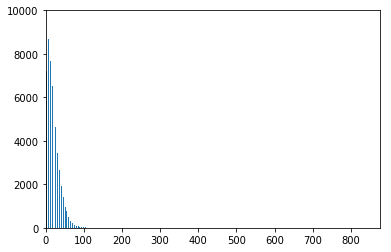

In [39]:
#Check distribution of the outcome
_ = plt.hist(x=air_visit_day.visitors, bins='auto')
_ = plt.xlim([air_visit_day.visitors.min(),air_visit_day.visitors.max()])
_ = plt.ylim([0,10000])
plt.show()
#The number of visits is highly positively skewed with a lot of zero values

In [40]:
air_visit_day.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 296279 entries, 0 to 296278
Data columns (total 20 columns):
air_store_id                296279 non-null object
visit_date                  296279 non-null datetime64[ns]
visitors                    296279 non-null int64
air_genre_name              296279 non-null object
air_area_name               296279 non-null object
latitude                    296279 non-null float64
longitude                   296279 non-null float64
day_of_week                 296279 non-null object
holiday_flg                 296279 non-null int64
station_id                  296279 non-null object
avg_temperature             296279 non-null float64
high_temperature            296279 non-null float64
low_temperature             296279 non-null float64
precipitation               296279 non-null float64
hours_sunlight              296279 non-null float64
avg_temperature_missing     296279 non-null bool
high_temperature_missing    296279 non-null bool
low_temperatu

In [41]:
#Remove extreme outliers (i.e. 3.4 std above the mean)
#Note: There are no negative values in this dataset so I'm only focusing on extreme or unreasonably high values



In [42]:
#Create variable for extreme valuesby (+ 3.5 std above mean), replace values that are above the extreme value and 
means = air_visit_day.groupby('air_store_id').mean()
means = means[['visitors']]
means = means.rename(columns = {'visitors':'mean_visitors'})
stds = air_visit_day.groupby('air_store_id').std()
stds = stds[['visitors']]
stds = stds.rename(columns = {'visitors':'std_visitors'})
extreme_values = means.merge(stds, how = 'left', on = 'air_store_id')
extreme_values['extreme_value'] = extreme_values['mean_visitors'] + 3.5*extreme_values['std_visitors']
extreme_values = extreme_values[['extreme_value']]
air_visit_day = air_visit_day.merge(extreme_values, how = 'left', on = 'air_store_id')
air_visit_day.loc[air_visit_day['visitors'] >= air_visit_day['extreme_value'], 'visitors_recode'] = air_visit_day['extreme_value']
air_visit_day.loc[air_visit_day['visitors'] < air_visit_day['extreme_value'], 'visitors_recode'] = air_visit_day['visitors']
air_visit_day.drop(columns = 'extreme_value')

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,...,high_temperature,low_temperature,precipitation,hours_sunlight,avg_temperature_missing,high_temperature_missing,low_temperature_missing,precipitation_missing,hours_sunlight_missing,visitors_recode
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,...,30.6,22.0,0.0,4.4,False,False,False,True,False,35.0
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,...,31.8,23.4,0.0,6.9,False,False,False,False,False,9.0
2,air_00a91d42b08b08d9,2016-07-03,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,...,35.4,24.6,0.0,7.6,False,False,False,True,False,0.0
3,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,...,33.8,23.6,1.5,7.1,False,False,False,False,False,20.0
4,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,...,25.6,20.2,0.0,0.0,False,False,False,False,False,25.0
5,air_00a91d42b08b08d9,2016-07-06,29,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Wednesday,0,tokyo__tokyo-kana__tonokyo,...,26.9,20.5,0.0,4.1,False,False,False,True,False,29.0
6,air_00a91d42b08b08d9,2016-07-07,34,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Thursday,0,tokyo__tokyo-kana__tonokyo,...,36.7,21.9,0.0,12.8,False,False,False,True,False,34.0
7,air_00a91d42b08b08d9,2016-07-08,42,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,...,29.8,22.1,0.0,2.1,False,False,False,False,False,42.0
8,air_00a91d42b08b08d9,2016-07-09,11,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,...,24.9,20.3,12.5,0.0,False,False,False,False,False,11.0
9,air_00a91d42b08b08d9,2016-07-10,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,...,31.3,20.2,0.0,11.7,False,False,False,True,False,0.0


In [43]:
air_visit_day.loc[air_visit_day['visitors'] >= air_visit_day['extreme_value'], 'visitors_recode'] = air_visit_day['extreme_value']
air_visit_day.loc[air_visit_day['visitors'] < air_visit_day['extreme_value'], 'visitors_recode'] = air_visit_day['visitors']
air_visit_day.drop(columns = 'extreme_value')

,air_store_id,visit_date,visitors,air_genre_name,air_area_name,latitude,longitude,day_of_week,holiday_flg,station_id,...,high_temperature,low_temperature,precipitation,hours_sunlight,avg_temperature_missing,high_temperature_missing,low_temperature_missing,precipitation_missing,hours_sunlight_missing,visitors_recode
0,air_00a91d42b08b08d9,2016-07-01,35,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,...,30.6,22.0,0.0,4.4,False,False,False,True,False,35.0
1,air_00a91d42b08b08d9,2016-07-02,9,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,...,31.8,23.4,0.0,6.9,False,False,False,False,False,9.0
2,air_00a91d42b08b08d9,2016-07-03,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,...,35.4,24.6,0.0,7.6,False,False,False,True,False,0.0
3,air_00a91d42b08b08d9,2016-07-04,20,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Monday,0,tokyo__tokyo-kana__tonokyo,...,33.8,23.6,1.5,7.1,False,False,False,False,False,20.0
4,air_00a91d42b08b08d9,2016-07-05,25,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Tuesday,0,tokyo__tokyo-kana__tonokyo,...,25.6,20.2,0.0,0.0,False,False,False,False,False,25.0
5,air_00a91d42b08b08d9,2016-07-06,29,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Wednesday,0,tokyo__tokyo-kana__tonokyo,...,26.9,20.5,0.0,4.1,False,False,False,True,False,29.0
6,air_00a91d42b08b08d9,2016-07-07,34,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Thursday,0,tokyo__tokyo-kana__tonokyo,...,36.7,21.9,0.0,12.8,False,False,False,True,False,34.0
7,air_00a91d42b08b08d9,2016-07-08,42,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Friday,0,tokyo__tokyo-kana__tonokyo,...,29.8,22.1,0.0,2.1,False,False,False,False,False,42.0
8,air_00a91d42b08b08d9,2016-07-09,11,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Saturday,0,tokyo__tokyo-kana__tonokyo,...,24.9,20.3,12.5,0.0,False,False,False,False,False,11.0
9,air_00a91d42b08b08d9,2016-07-10,0,Italian/French,Tōkyō-to Chiyoda-ku Kudanminami,35.694003,139.753595,Sunday,0,tokyo__tokyo-kana__tonokyo,...,31.3,20.2,0.0,11.7,False,False,False,True,False,0.0


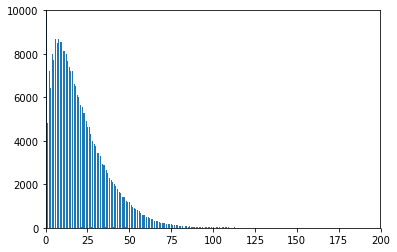

count    296279.000000
mean         17.778167
std          16.607249
min           0.000000
25%           5.000000
50%          14.000000
75%          26.000000
max         199.855943
Name: visitors_recode, dtype: float64


In [44]:
#Check distribution of the recoded outcome
_ = plt.hist(x=air_visit_day.visitors_recode, bins='auto')
_ = plt.xlim([air_visit_day.visitors_recode.min(),air_visit_day.visitors_recode.max()])
_ = plt.ylim([0,10000])
plt.show()
print(air_visit_day.visitors_recode.describe())

In [45]:
#Read to csv for EDA
path = 'C:/Users/robva/Springboard/Capstone Project 1/EDA/file_for_analysis.csv'
air_visit_day.to_csv(path)